In [1]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00:00:0100:01
  Attempting unins

In [2]:
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
data_yaml = "/kaggle/input/cardetection/car/data.yaml"

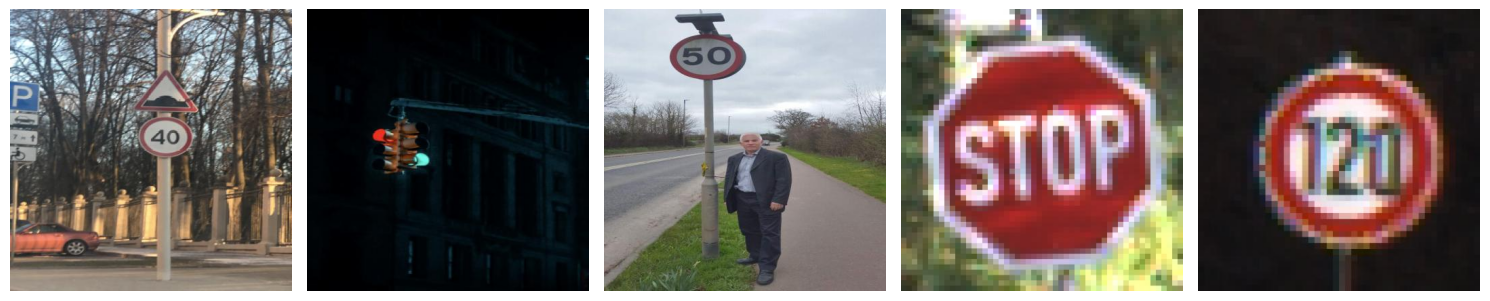

In [14]:
# Define the path to the training images
train_images_path = '/kaggle/input/cardetection/car/train/images/'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Select a few random images to display (e.g., 3 images)
num_samples = 5
selected_images = random.sample(image_files, num_samples)

# Display the selected images
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(train_images_path, image_file)
    img = mpimg.imread(img_path)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Load a pretrained model (YOLOv8n for speed, YOLOv8m/l for accuracy)
model = YOLO("yolov8n.pt")

# Train
model.train(
    data=data_yaml,   # dataset yaml path
    epochs=50,        # adjust as needed
    imgsz=640,        # image size
    batch=16
)

Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.1±0.7 ms, read: 3.2±0.7 MB/s, size: 24.1 KB)


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:23<00:00, 149.11it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.7±1.8 MB/s, size: 20.7 KB)


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:05<00:00, 140.40it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G     0.8418      3.415       1.18         25        640: 100%|██████████| 221/221 [00:38<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.65it/s]


                   all        801        944      0.187      0.471      0.239      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.55G     0.7743      2.541      1.112         35        640: 100%|██████████| 221/221 [00:35<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.45it/s]

                   all        801        944      0.316      0.537      0.351      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G      0.746      2.201      1.084         20        640: 100%|██████████| 221/221 [00:35<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.03it/s]

                   all        801        944      0.346      0.587      0.451      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G     0.7317      1.869      1.062         24        640: 100%|██████████| 221/221 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.57it/s]

                   all        801        944       0.57      0.542      0.597      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.61G     0.7055      1.586      1.053         17        640: 100%|██████████| 221/221 [00:35<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]

                   all        801        944      0.695      0.656      0.746      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.61G     0.6955      1.387      1.048         26        640: 100%|██████████| 221/221 [00:35<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.684      0.711      0.757      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.64G     0.6687      1.273      1.029         23        640: 100%|██████████| 221/221 [00:34<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.66it/s]

                   all        801        944      0.725      0.681      0.773      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.66G     0.6553      1.174      1.022         24        640: 100%|██████████| 221/221 [00:34<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944        0.8      0.791       0.85      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.67G     0.6678      1.101      1.024         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]

                   all        801        944      0.877      0.757      0.857      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.68G     0.6407      1.032      1.015         30        640: 100%|██████████| 221/221 [00:35<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.66it/s]

                   all        801        944       0.89      0.775      0.877      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.71G     0.6434     0.9908      1.014         26        640: 100%|██████████| 221/221 [00:34<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.72it/s]

                   all        801        944       0.87      0.813      0.875      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G     0.6278     0.9503      1.008         15        640: 100%|██████████| 221/221 [00:34<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.916      0.835      0.902      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.74G     0.6362     0.8981      1.006         30        640: 100%|██████████| 221/221 [00:34<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]

                   all        801        944      0.923      0.836      0.909      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.75G     0.6128     0.8986     0.9926         24        640: 100%|██████████| 221/221 [00:34<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.60it/s]

                   all        801        944      0.929       0.84      0.918      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.78G     0.6117     0.8664      1.003         22        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.57it/s]

                   all        801        944      0.946      0.832      0.922      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.79G     0.6071      0.848     0.9988         24        640: 100%|██████████| 221/221 [00:34<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        801        944      0.942      0.846      0.924      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.81G     0.6052     0.8243     0.9944         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.73it/s]

                   all        801        944      0.936      0.849      0.919      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.82G     0.5962     0.8091     0.9958         24        640: 100%|██████████| 221/221 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.941      0.846      0.933      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.84G     0.5988     0.8051     0.9876         25        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.59it/s]

                   all        801        944      0.936      0.849      0.924      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.86G     0.5926      0.762     0.9874         23        640: 100%|██████████| 221/221 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.70it/s]

                   all        801        944      0.945      0.856      0.933       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.88G     0.5802     0.7426     0.9828         17        640: 100%|██████████| 221/221 [00:34<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.69it/s]

                   all        801        944      0.961      0.839      0.935      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.88G     0.5802     0.7303     0.9782         24        640: 100%|██████████| 221/221 [00:34<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.78it/s]

                   all        801        944      0.959      0.862      0.941      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.91G     0.5803     0.7139     0.9782         31        640: 100%|██████████| 221/221 [00:34<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.76it/s]

                   all        801        944      0.943      0.878      0.943      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.93G     0.5699     0.6928     0.9761         18        640: 100%|██████████| 221/221 [00:34<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.55it/s]

                   all        801        944      0.925      0.869      0.929       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.95G     0.5664     0.6974     0.9784         18        640: 100%|██████████| 221/221 [00:34<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.931      0.871      0.938      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.95G     0.5756     0.6914     0.9774         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        801        944      0.948      0.879      0.947      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.98G     0.5587      0.667     0.9728         22        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.944      0.881       0.94      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         3G      0.565     0.6661     0.9681         28        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]


                   all        801        944      0.942      0.868      0.949      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.02G     0.5477     0.6493     0.9625         27        640: 100%|██████████| 221/221 [00:34<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


                   all        801        944      0.944       0.89       0.95      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.02G     0.5465     0.6409     0.9657         23        640: 100%|██████████| 221/221 [00:34<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.65it/s]

                   all        801        944      0.941      0.893      0.954      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.05G     0.5541     0.6289     0.9622         22        640: 100%|██████████| 221/221 [00:34<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.69it/s]

                   all        801        944      0.946       0.91      0.957      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.07G     0.5482     0.6234     0.9635         15        640: 100%|██████████| 221/221 [00:34<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.59it/s]

                   all        801        944      0.953      0.896      0.953      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.08G     0.5534     0.6259     0.9666         18        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.56it/s]

                   all        801        944      0.952      0.906      0.959      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.09G     0.5441     0.6004     0.9594         20        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        801        944      0.941      0.901      0.955      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.12G     0.5314      0.604     0.9615         17        640: 100%|██████████| 221/221 [00:34<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.76it/s]

                   all        801        944      0.956      0.895      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.13G     0.5225     0.5903     0.9539         21        640: 100%|██████████| 221/221 [00:34<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.948      0.901      0.952       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.15G     0.5264     0.5895     0.9573         31        640: 100%|██████████| 221/221 [00:34<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        801        944      0.941      0.914      0.957      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.16G     0.5228     0.5818     0.9544         22        640: 100%|██████████| 221/221 [00:34<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        801        944      0.952      0.906      0.959      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.19G     0.5227     0.5668     0.9528         29        640: 100%|██████████| 221/221 [00:34<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]

                   all        801        944      0.937      0.909      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.2G     0.5233      0.569     0.9542         23        640: 100%|██████████| 221/221 [00:34<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        801        944      0.945      0.882      0.952      0.818


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.22G     0.5219     0.3783     0.9196         13        640: 100%|██████████| 221/221 [00:34<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.61it/s]

                   all        801        944      0.954      0.908      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.23G     0.5133     0.3628     0.9191         14        640: 100%|██████████| 221/221 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        801        944       0.96      0.908      0.961      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.26G     0.5107     0.3627     0.9135         11        640: 100%|██████████| 221/221 [00:33<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]

                   all        801        944      0.957      0.918      0.964      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.27G      0.504     0.3468     0.9151         10        640: 100%|██████████| 221/221 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.77it/s]

                   all        801        944       0.93      0.926      0.966      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.29G     0.5019     0.3428       0.91         11        640: 100%|██████████| 221/221 [00:33<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]

                   all        801        944      0.959      0.922      0.966      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.3G     0.4997     0.3384     0.9069         10        640: 100%|██████████| 221/221 [00:33<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]

                   all        801        944      0.947      0.929      0.966      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.33G     0.4897     0.3389     0.9012         13        640: 100%|██████████| 221/221 [00:34<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.75it/s]

                   all        801        944      0.963      0.915      0.966      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.34G     0.4893     0.3311     0.9064         14        640: 100%|██████████| 221/221 [00:33<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]

                   all        801        944      0.962       0.92      0.966      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.36G     0.4856      0.324     0.9007         13        640: 100%|██████████| 221/221 [00:34<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.87it/s]

                   all        801        944      0.961      0.915      0.966       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.37G     0.4786     0.3175     0.8995         13        640: 100%|██████████| 221/221 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        801        944      0.955      0.923      0.967      0.841



50 epochs completed in 0.549 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.55it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        801        944      0.962       0.92      0.966      0.841
           Green Light         87        122      0.902      0.721      0.858      0.534
             Red Light         74        108      0.869      0.738      0.838      0.526
       Speed Limit 100         52         52          1      0.999      0.995      0.893
       Speed Limit 110         17         17      0.948      0.941      0.975      0.901
       Speed Limit 120         60         60      0.996          1      0.995      0.925
        Speed Limit 20         56         56      0.936      0.982      0.985      0.869
        Speed Limit 30         71         74      0.961      0.959      0.991      0.934
        Speed Limit 40         53         55      0.967      0.982      0.992      0.901
        Speed Limit 50         68         71          1      0.886      0.982      0.876
        Speed Limit 60         76         76      0.953      0.934      0.971      0.892
        Speed Limit 7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca6b1549850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [5]:
metrics = model.val(data=data_yaml, split="test")
print(metrics)

Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.7±0.9 MB/s, size: 20.4 KB)


val: Scanning /kaggle/input/cardetection/car/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:04<00:00, 137.00it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:05<00:00,  7.23it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        638        770      0.947      0.913      0.955      0.819
           Green Light         77        110       0.94       0.85      0.915      0.551
             Red Light         71         94      0.848      0.713      0.776        0.5
        Speed Limit 10          2          3      0.952          1      0.995      0.808
       Speed Limit 100         45         46      0.895          1      0.988      0.853
       Speed Limit 110         21         21      0.984       0.81      0.906      0.829
       Speed Limit 120         40         44       0.93          1      0.987       0.89
        Speed Limit 20         46         46      0.962      0.978      0.978      0.893
        Speed Limit 30         60         60      0.946      0.881      0.975      0.898
        Speed Limit 40         51         53          1      0.961      0.985      0.878
        Speed Limit 50         47         50      0.974       0.88      0.958      0.858
        Speed Limit 6

In [6]:
# Test the model on a video
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model.predict('/kaggle/input/cardetection/video.mp4', save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 7.3ms
video 1/1 (frame 2/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 7.3ms
video 1/1 (frame 3/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 7.3ms
video 1/1 (frame 4/508) /kaggle/input/cardetection/video.mp4: 640x640 (no detections), 7.2ms
video 1/1 (frame 5/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Speed Limit 20, 1 Stop, 7.2ms
video 1/1

In [7]:
from IPython.display import Video
Video('/kaggle/input/cardetection/video.mp4', embed=True)


image 1/1 /kaggle/input/cardetection/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


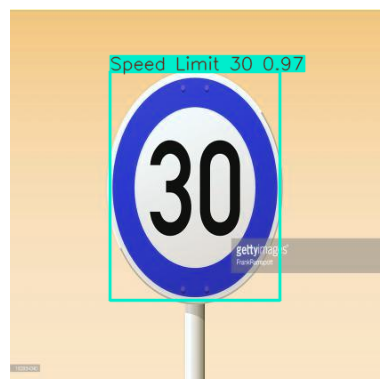

In [8]:
import matplotlib.pyplot as plt
# Test the model on an image
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model.predict('/kaggle/input/cardetection/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg', save=True)

plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

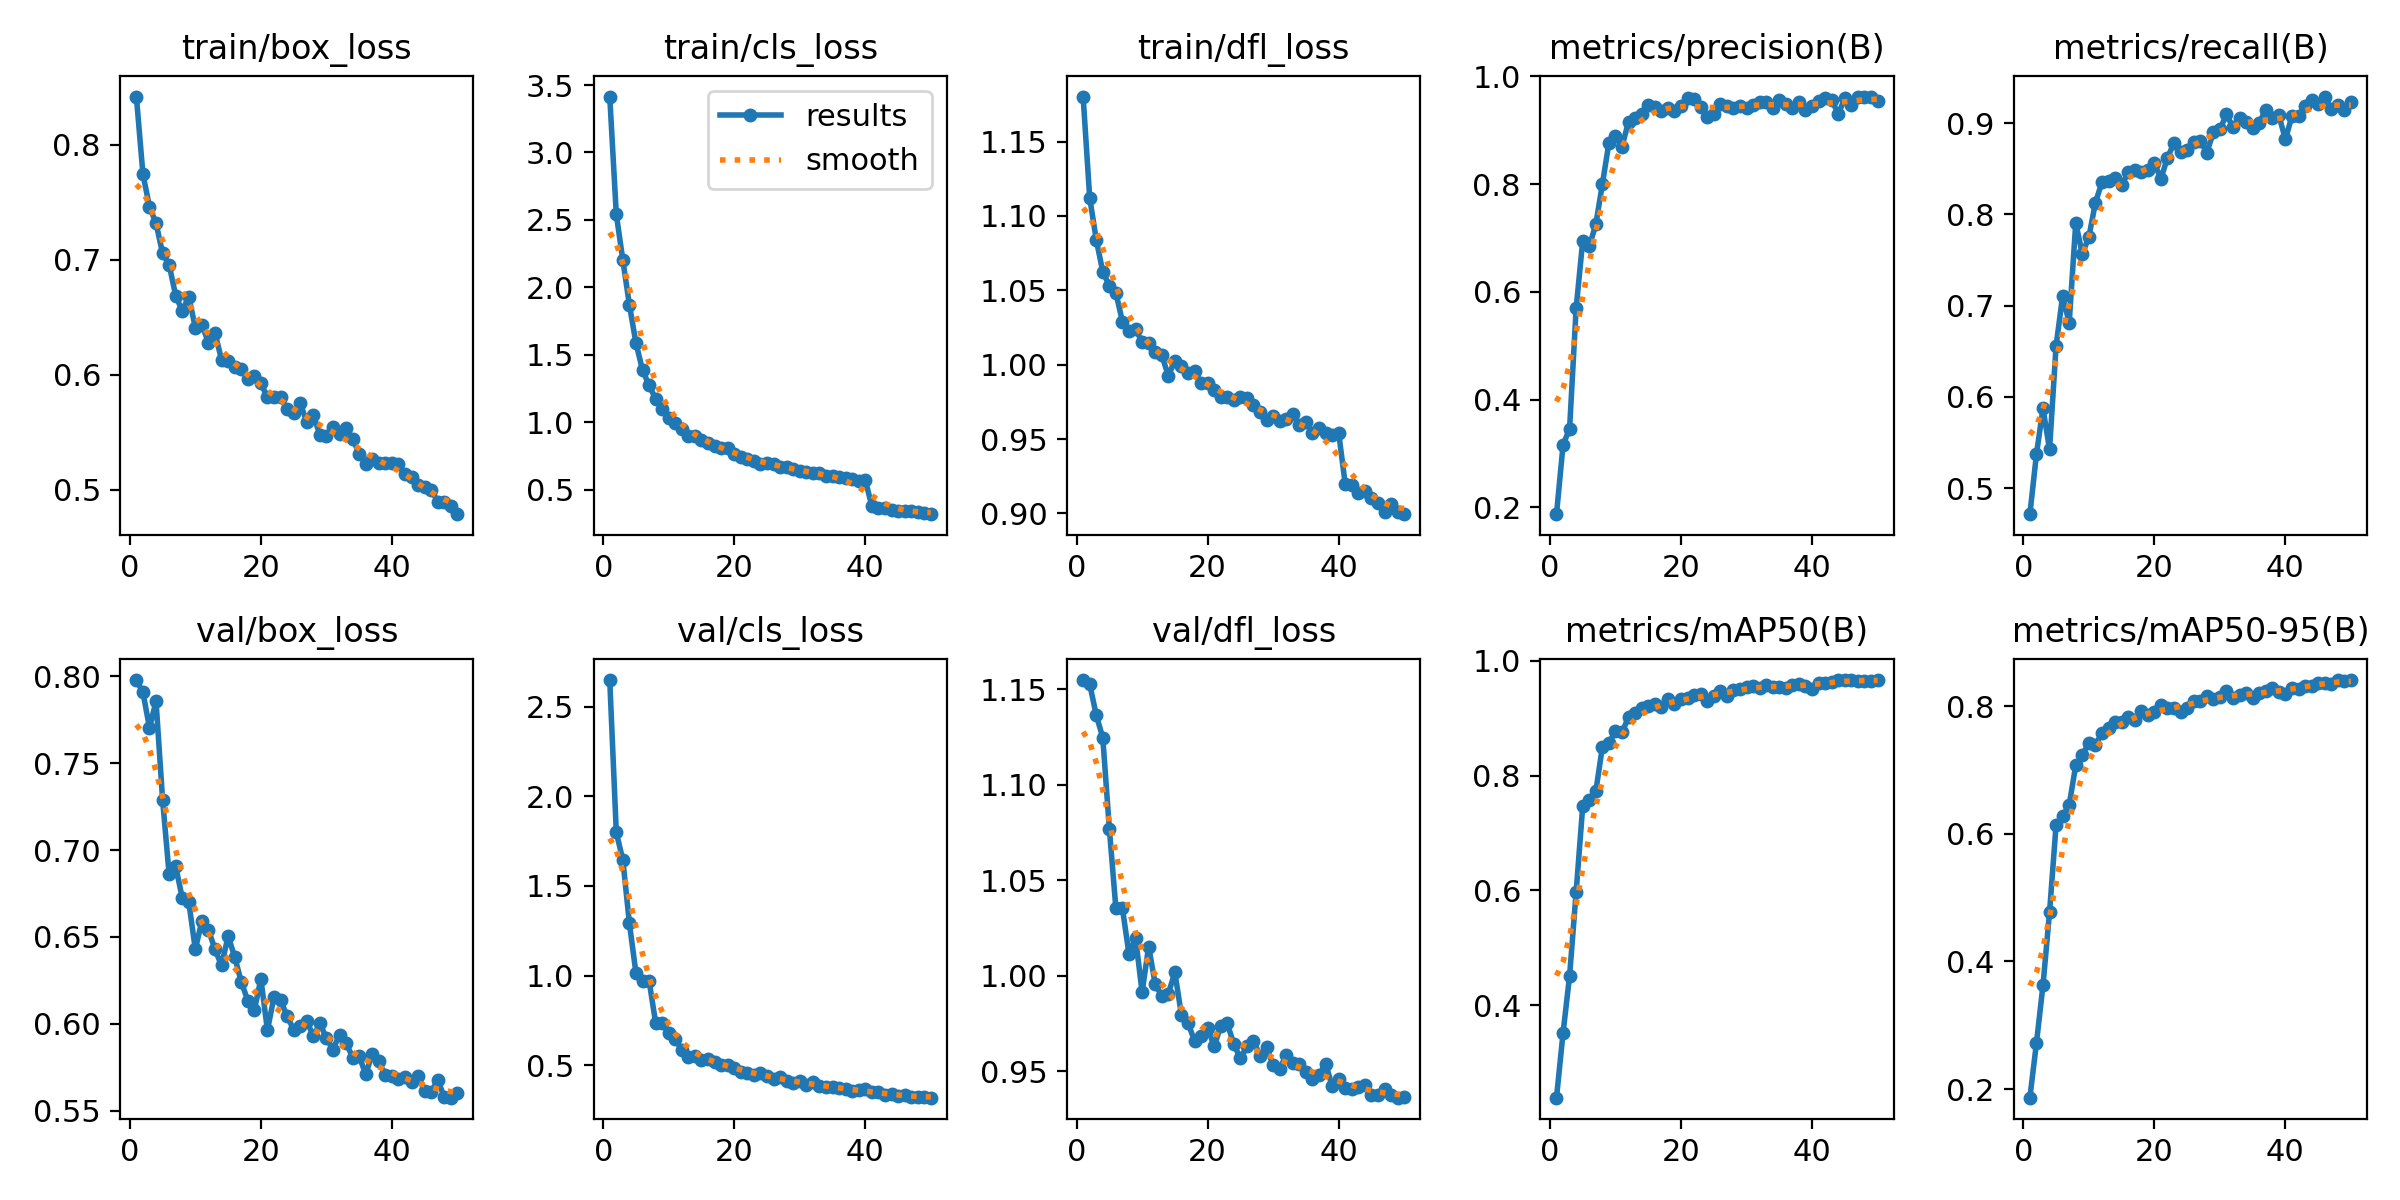

In [10]:
from IPython.display import display
from PIL import Image

# Load the results from the training run
results_dir = '/kaggle/working/runs/detect/train'
loss_plot_path = results_dir + 'results.png'

# Display the loss plot image
try:
    img = Image.open(loss_plot_path)
    display(img)
except FileNotFoundError:
    print(f"Loss plot not found at {loss_plot_path}. Please ensure training completed successfully.")